Question 1 _ PART 1 ( Manual Perceptron Boundary )

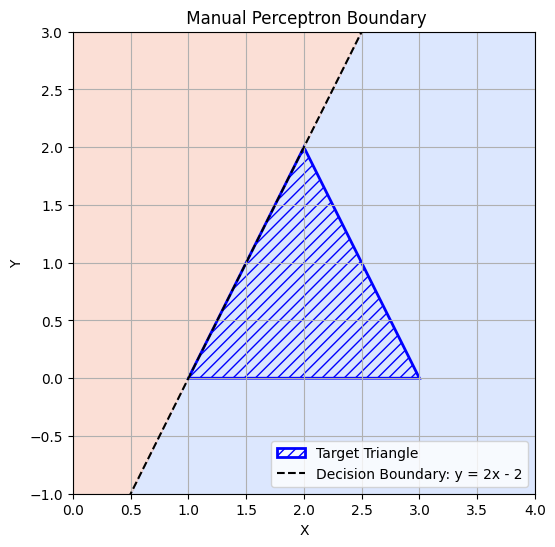

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Triangle vertices (same as the original triangle)
A = (2, 2)
B = (3, 0)
C = (1, 0)
triangle = np.array([A, B, C])

# Define new weights and threshold
w = np.array([-2, 1])  # weights: [-2 for x, +1 for y]
theta = -2             # threshold

# Create a grid of (x, y) points
x_vals = np.linspace(0, 4, 300)
y_vals = np.linspace(-1, 3, 300)
xx, yy = np.meshgrid(x_vals, y_vals)
grid = np.c_[xx.ravel(), yy.ravel()]

# Compute decision output
z = grid @ w - theta
z = (z >= 0).astype(int)  # Apply step activation
zz = z.reshape(xx.shape)

# Plot decision region
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, zz, alpha=0.3, cmap='coolwarm', levels=[-1, 0, 1])

# Draw target triangle
triangle_patch = Polygon(triangle, closed=True, fill=True,
                         edgecolor='blue', facecolor='none',
                         hatch='///', linewidth=2, label='Target Triangle')
plt.gca().add_patch(triangle_patch)

# Plot decision boundary (line: y = 2x - 2)
line_x = np.linspace(0, 4, 100)
line_y = 2 * line_x - 2
plt.plot(line_x, line_y, 'k--', label='Decision Boundary: y = 2x - 2')

# Final plot settings
plt.xlim(0, 4)
plt.ylim(-1, 3)
plt.xlabel("X")
plt.ylabel("Y")
plt.title(" Manual Perceptron Boundary")
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal')
plt.show()


Question 1 _ PART 1 ( Simple Perceptron Classification)

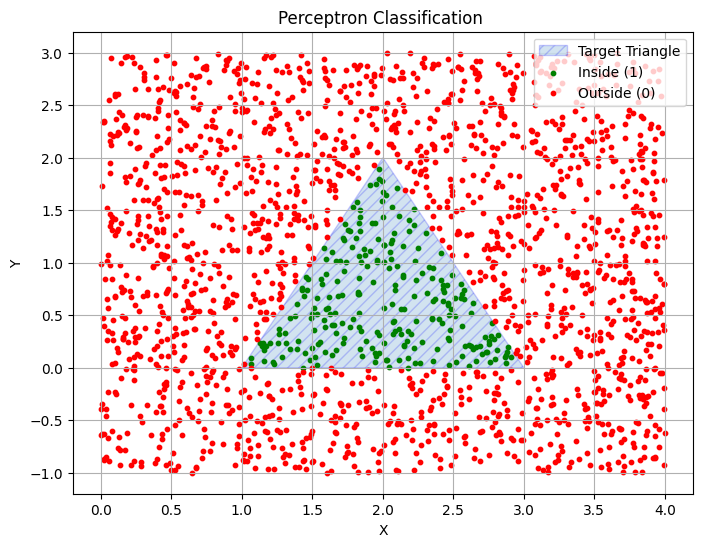

Decision boundary equation:
   0.1641 * x + 0.0587 * y + -0.0523 = 0
⟹   y = -0.1641/(0.0587) * x + 0.0523/(0.0587)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path

# Step 1: Define triangle vertices (based on shape 1(a))
A = (2, 2)
B = (3, 0)
C = (1, 0)
triangle = np.array([A, B, C])

# Step 2: Generate random data points in X ∈ [0, 4], Y ∈ [-1, 3]
np.random.seed(0)
num_points = 2000
X_points = np.random.uniform(0, 4, (num_points, 1))
Y_points = np.random.uniform(-1, 3, (num_points, 1))
XY = np.hstack((X_points, Y_points))  # shape: (2000, 2)

# Step 3: Create a path object to define the triangle region
path = Path(triangle)

# Step 4: Determine if each point is inside the triangle → label = 1, else label = 0
labels = path.contains_points(XY).astype(int)

# Inputs (X) and labels (y) are from previous step
X_input = XY
y_true = labels

# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(2)
bias = np.random.randn()

# Learning rate and epochs
lr = 0.1
epochs = 30

# Training loop
for epoch in range(epochs):
    for i in range(len(X_input)):
        x_i = X_input[i]
        y_i = y_true[i]

        # Compute linear combination
        z = np.dot(weights, x_i) + bias

        # Activation function (step)
        y_pred = 1 if z >= 0 else 0

        # Update rule (Perceptron learning rule)
        error = y_i - y_pred
        weights += lr * error * x_i
        bias += lr * error

# --- Plot the data points and triangle (NO decision boundary) ---
plt.figure(figsize=(8, 6))

# Re-draw the triangle
triangle = np.array([(2, 2), (3, 0), (1, 0)])
plt.gca().add_patch(
    Polygon(triangle, fill=True, edgecolor='blue', alpha=0.2, hatch='///', label='Target Triangle')
)

# Points inside = green, outside = red
plt.scatter(X_input[y_true == 1][:, 0], X_input[y_true == 1][:, 1], c='green', s=10, label='Inside (1)')
plt.scatter(X_input[y_true == 0][:, 0], X_input[y_true == 0][:, 1], c='red', s=10, label='Outside (0)')

# Plot setup
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Perceptron Classification ")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# --- Print the decision boundary equation instead of drawing it ---
w1, w2 = weights
b = bias
print("Decision boundary equation:")
print(f"   {w1:.4f} * x + {w2:.4f} * y + {b:.4f} = 0")
print(f"⟹   y = {-w1:.4f}/({w2:.4f}) * x + {-b:.4f}/({w2:.4f})")

Question 1 _ PART 2 ( Triangle Region Classification Using McCulloch-Pitts Neurons )

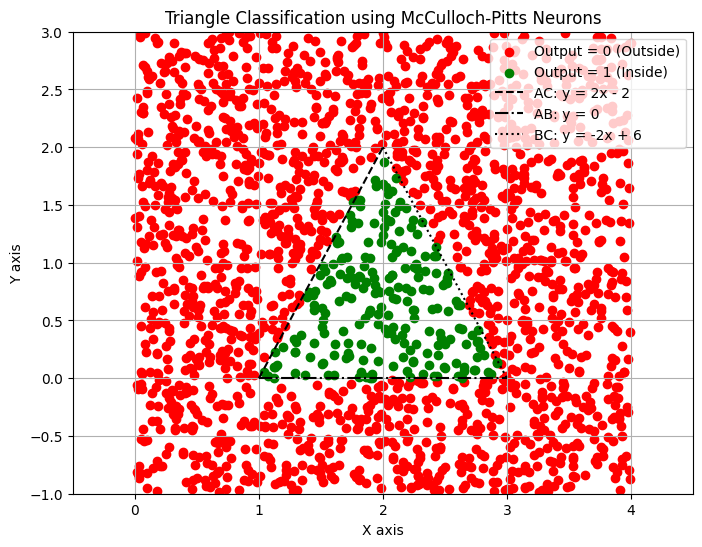

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts Neuron class
class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold):
        self.weights = weights         # Set the weights of the neuron
        self.threshold = threshold     # Set the threshold (bias)

    def model(self, x):
        # Apply the threshold activation function
        if self.weights @ x >= self.threshold:
            return 1
        else:
            return 0

# Define the decision function based on the triangle edges
def Area(x, y):
    # Define three neurons for each line of the triangle
    neur1 = McCulloch_Pitts_neuron([2, -1], 2)     # Line AC: y <= 2x - 2
    neur2 = McCulloch_Pitts_neuron([-2, -1], -6)   # Line AB: y <= -2x + 6
    neur3 = McCulloch_Pitts_neuron([0, 1], 0)      # Line BC: y >= 0

    # Apply each neuron to the point (x, y)
    z1 = neur1.model(np.array([x, y]))
    z2 = neur2.model(np.array([x, y]))
    z3 = neur3.model(np.array([x, y]))

    # Final neuron checks if the point satisfies all 3 conditions (AND operation)
    final_neuron = McCulloch_Pitts_neuron([1, 1, 1], 3)
    z_final = final_neuron.model(np.array([z1, z2, z3]))

    return [z_final]

# Generate 2000 random points in the specified range
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

# Classify points based on Area function
green_points = []   # Points inside the triangle (output = 1)
red_points = []     # Points outside the triangle (output = 0)

for i in range(num_points):
    result = Area(x_values[i], y_values[i])
    if result == [1]:
        green_points.append((x_values[i], y_values[i]))
    else:
        red_points.append((x_values[i], y_values[i]))

# Separate x and y for plotting
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting the points
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='Output = 0 (Outside)')
plt.scatter(green_x, green_y, color='green', label='Output = 1 (Inside)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Triangle Classification using McCulloch-Pitts Neurons')

# Draw triangle boundary lines
plt.plot([1, 2], [0, 2], 'k--', label='AC: y = 2x - 2')
plt.plot([1, 3], [0, 0], 'k-.', label='AB: y = 0')
plt.plot([2, 3], [2, 0], 'k:', label='BC: y = -2x + 6')

# Grid and axis formatting
plt.grid(True)
plt.xlim(-0.5, 4.5)
plt.ylim(-1, 3)
plt.legend(loc='upper right')
plt.show()


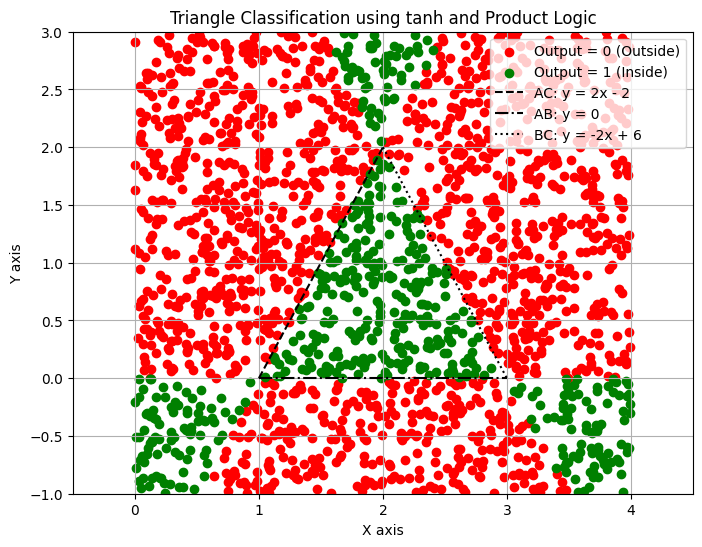

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Define McCulloch-Pitts Neuron class with tanh activation
class McCulloch_Pitts_neuron_tanh():
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def model(self, x):
        z = np.dot(self.weights, x) + self.bias
        return np.tanh(z)  # tanh activation function

# Define the Area function using product of outputs
def Area(x, y):
    # Define neurons for each edge of the triangle
    n1 = McCulloch_Pitts_neuron_tanh([2, -1], -2)     # y <= 2x - 2
    n2 = McCulloch_Pitts_neuron_tanh([-2, -1], 6)     # y <= -2x + 6
    n3 = McCulloch_Pitts_neuron_tanh([0, 1], 0)       # y >= 0

    # Apply each neuron
    z1 = n1.model(np.array([x, y]))
    z2 = n2.model(np.array([x, y]))
    z3 = n3.model(np.array([x, y]))

    # Combine outputs using product
    z_final = z1 * z2 * z3

    # Return 1 if output is positive (green), else 0 (red)
    return [1] if z_final > 0 else [0]

# Generate 2000 random data points in specified range
num_points = 2000
x_vals = np.random.uniform(0, 4, num_points)
y_vals = np.random.uniform(-1, 3, num_points)

# Classify points
green_points = []
red_points = []

for i in range(num_points):
    result = Area(x_vals[i], y_vals[i])
    if result == [1]:
        green_points.append((x_vals[i], y_vals[i]))
    else:
        red_points.append((x_vals[i], y_vals[i]))

# Extract X and Y values for plotting
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='Output = 0 (Outside)')
plt.scatter(green_x, green_y, color='green', label='Output = 1 (Inside)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Triangle Classification using tanh and Product Logic')

# Plot triangle boundaries
plt.plot([1, 2], [0, 2], 'k--', label='AC: y = 2x - 2')
plt.plot([1, 3], [0, 0], 'k-.', label='AB: y = 0')
plt.plot([2, 3], [2, 0], 'k:', label='BC: y = -2x + 6')

plt.grid(True)
plt.xlim(-0.5, 4.5)
plt.ylim(-1, 3)
plt.legend(loc='upper right')
plt.show()


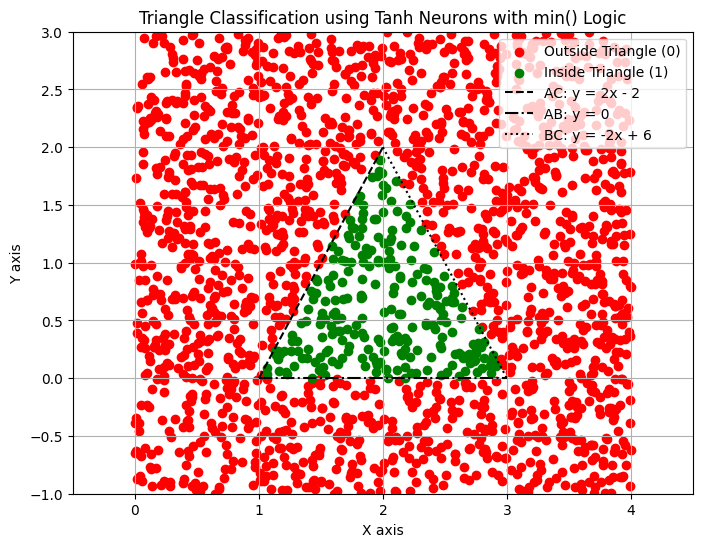

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a neuron with tanh activation
class TanhNeuron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def model(self, x):
        z = self.weights @ x + self.bias
        return np.tanh(z)

# Define the decision area using tanh neurons and min logic
def Area(x, y):
    n1 = TanhNeuron([2, -1], -2)   # y <= 2x - 2  --> neuron1
    n2 = TanhNeuron([-2, -1], 6)   # y <= -2x + 6 --> neuron2
    n3 = TanhNeuron([0, 1], 0)     # y >= 0       --> neuron3

    z1 = n1.model(np.array([x, y]))
    z2 = n2.model(np.array([x, y]))
    z3 = n3.model(np.array([x, y]))

    # Decision based on minimum output
    return 1 if min(z1, z2, z3) > 0 else 0

# Generate random points
np.random.seed(0)
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

green_points = []
red_points = []

for i in range(num_points):
    if Area(x_values[i], y_values[i]) == 1:
        green_points.append((x_values[i], y_values[i]))
    else:
        red_points.append((x_values[i], y_values[i]))

# Separate coordinates
red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

# Plot the points
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='Outside Triangle (0)')
plt.scatter(green_x, green_y, color='green', label='Inside Triangle (1)')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Triangle Classification using Tanh Neurons with min() Logic')

# Draw triangle edges for reference
plt.plot([1, 2], [0, 2], 'k--', label='AC: y = 2x - 2')
plt.plot([1, 3], [0, 0], 'k-.', label='AB: y = 0')
plt.plot([2, 3], [2, 0], 'k:', label='BC: y = -2x + 6')

plt.grid(True)
plt.xlim(-0.5, 4.5)
plt.ylim(-1, 3)
plt.legend(loc='upper right')
plt.show()


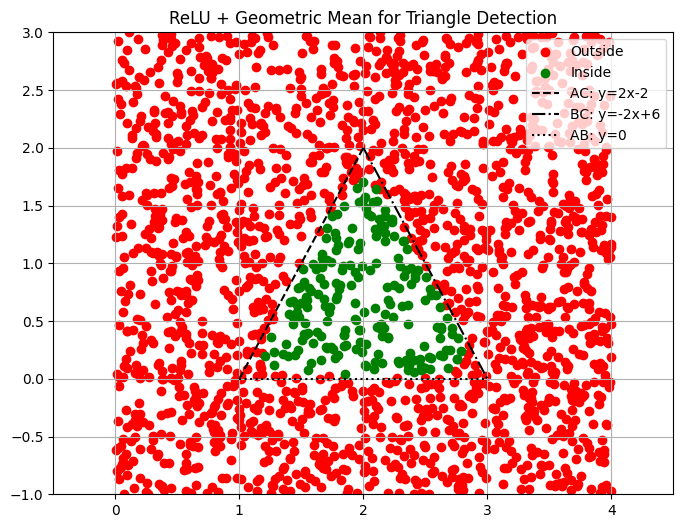

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

def geometric_mean(arr):
    product = np.prod(arr)
    return product ** (1 / len(arr)) if product > 0 else 0

class ReLU_Neuron:
    def __init__(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

    def model(self, x):
        return relu(self.weights @ x + self.bias)

def Area(x, y):
    n1 = ReLU_Neuron([2, -1], -2)   # y <= 2x - 2
    n2 = ReLU_Neuron([-2, -1], 6)   # y <= -2x + 6
    n3 = ReLU_Neuron([0, 1], 0)     # y >= 0

    z1 = n1.model(np.array([x, y]))
    z2 = n2.model(np.array([x, y]))
    z3 = n3.model(np.array([x, y]))

    return [geometric_mean([z1, z2, z3])]

# Generate random points
num_points = 2000
x_vals = np.random.uniform(0, 4, num_points)
y_vals = np.random.uniform(-1, 3, num_points)

green_pts = []
red_pts = []

for i in range(num_points):
    out = Area(x_vals[i], y_vals[i])
    if out[0] > 0.5:
        green_pts.append((x_vals[i], y_vals[i]))
    else:
        red_pts.append((x_vals[i], y_vals[i]))

# Plot
rx, ry = zip(*red_pts)
gx, gy = zip(*green_pts)

plt.figure(figsize=(8,6))
plt.scatter(rx, ry, color='red', label='Outside')
plt.scatter(gx, gy, color='green', label='Inside')
plt.plot([1, 2], [0, 2], 'k--', label='AC: y=2x-2')
plt.plot([2, 3], [2, 0], 'k-.', label='BC: y=-2x+6')
plt.plot([1, 3], [0, 0], 'k:', label='AB: y=0')
plt.grid(True)
plt.xlim(-0.5, 4.5)
plt.ylim(-1, 3)
plt.title('ReLU + Geometric Mean for Triangle Detection')
plt.legend(loc='upper right')
plt.show()
